In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima_process import ArmaProcess
from pmdarima.arima import ndiffs
import pmdarima as pm
from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [30]:
data = pd.read_csv('c:/temp/Cleaned_dataset_P&B.csv', parse_dates=['DATE'], index_col=["DATE"])
pd.set_option('display.max_rows', None)
data

NAICS_DESC            anonimized_name  \
DATE                                                                    
2020-10-20              Offices of Lawyers           Aaron Walker INC   
2020-11-12              Offices of Lawyers           Aaron Walker INC   
2020-11-13              Offices of Lawyers           Aaron Walker INC   
2020-11-30              Offices of Lawyers           Aaron Walker INC   
2020-12-01              Offices of Lawyers           Aaron Walker INC   
2020-12-02              Offices of Lawyers           Aaron Walker INC   
2020-12-03              Offices of Lawyers           Aaron Walker INC   
2020-12-04              Offices of Lawyers           Aaron Walker INC   
2020-12-07              Offices of Lawyers           Aaron Walker INC   
2020-12-08              Offices of Lawyers           Aaron Walker INC   
2020-12-09              Offices of Lawyers           Aaron Walker INC   
2020-12-10              Offices of Lawyers           Aaron Walker INC   
2020-12-11              Offices of Lawyers           Aaron Walker INC   
2020-12-14              Offices of Lawyers           Aaron Walker INC   
2020-12-15              Offices of Lawyers           Aaron Walker INC   
2020-12-16              Offices of Lawyers           Aaron Walker INC   
2020-12-17              Offices of Lawyers           Aaron Walker INC   
2020-12-18              Offices of Lawyers           Aaron Walker INC   
2020-12-21              Offices of Lawyers           Aaron Walker INC   
2020-12-22              Offices of Lawyers           Aaron Walker INC   
2020-12-23              Offices of Lawyers           Aaron Walker INC   
2020-12-28              Offices of Lawyers           Aaron Walker INC   
2020-12-29              Offices of Lawyers           Aaron Walker INC   
2020-12-30              Offices of Lawyers           Aaron Walker INC   
2020-12-31              Offices of Lawyers           Aaron Walker INC   
2021-01-04              Offices of Lawyers           Aaron Walker INC   
2021-01-05              Offices of Lawyers           Aaron Walker INC   
2021-01-06              Offices of Lawyers           Aaron Walker INC   
2021-01-07              Offices of Lawyers           Aaron Walker INC   
2021-01-08              Offices of Lawyers           Aaron Walker INC   
2021-01-11              Offices of Lawyers           Aaron Walker INC   
2021-01-12              Offices of Lawyers           Aaron Walker INC   
2021-01-13              Offices of Lawyers           Aaron Walker INC   
2021-01-14              Offices of Lawyers           Aaron Walker INC   
2021-01-15              Offices of Lawyers           Aaron Walker INC   
2021-01-19              Offices of Lawyers           Aaron Walker INC   
2021-01-20              Offices of Lawyers           Aaron Walker INC   
2021-01-21              Offices of Lawyers           Aaron Walker INC   
2021-01-22              Offices of Lawyers           Aaron Walker INC   
2021-01-25              Offices of Lawyers           Aaron Walker INC   
2021-01-26              Offices of Lawyers           Aaron Walker INC   
2021-01-27              Offices of Lawyers           Aaron Walker INC   
2021-01-28              Offices of Lawyers           Aaron Walker INC   
2021-01-29              Offices of Lawyers           Aaron Walker INC   
2021-02-01              Offices of Lawyers           Aaron Walker INC   
2021-02-02              Offices of Lawyers           Aaron Walker INC   
2021-02-03              Offices of Lawyers           Aaron Walker INC   
2021-02-04              Offices of Lawyers           Aaron Walker INC   
2021-02-05              Offices of Lawyers           Aaron Walker INC   
2021-02-08              Offices of Lawyers           Aaron Walker INC   
2021-02-09              Offices of Lawyers           Aaron Walker INC   
2021-02-10              Offices of Lawyers           Aaron Walker INC   
2021-02-11              Offices of Lawyers           Aaron Walker INC   
2021-02-12       

In [31]:
df2 = data.loc[data['anonimized_name']=="Jacob Stein INC"]
df2

NAICS_DESC  anonimized_name  total_revenue
DATE                                                                      
2020-03-05  Direct Property and Casualty I  Jacob Stein INC           1228
2020-03-06  Direct Property and Casualty I  Jacob Stein INC           6149
2020-03-09  Direct Property and Casualty I  Jacob Stein INC          10106
2020-03-10  Direct Property and Casualty I  Jacob Stein INC          10567
2020-03-11  Direct Property and Casualty I  Jacob Stein INC           6833
2020-03-12  Direct Property and Casualty I  Jacob Stein INC           3878
2020-03-13  Direct Property and Casualty I  Jacob Stein INC           5693
2020-03-16  Direct Property and Casualty I  Jacob Stein INC           4942
2020-03-17  Direct Property and Casualty I  Jacob Stein INC           6106
2020-03-18  Direct Property and Casualty I  Jacob Stein INC           4443
2020-03-19  Direct Property and Casualty I  Jacob Stein INC           8340
2020-03-20  Direct Property and Casualty I  Jacob Stein INC          35570
2020-03-23  Direct Property and Casualty I  Jacob Stein INC           4838
2020-03-24  Direct Property and Casualty I  Jacob Stein INC           6718
2020-03-25  Direct Property and Casualty I  Jacob Stein INC           3492
2020-03-26  Direct Property and Casualty I  Jacob Stein INC           3958
2020-03-27  Direct Property and Casualty I  Jacob Stein INC           4115
2020-03-30  Direct Property and Casualty I  Jacob Stein INC           3582
2020-03-31  Direct Property and Casualty I  Jacob Stein INC           3950
2020-04-01  Direct Property and Casualty I  Jacob Stein INC           3820
2020-04-02  Direct Property and Casualty I  Jacob Stein INC           2953
2020-04-03  Direct Property and Casualty I  Jacob Stein INC           7227
2020-04-06  Direct Property and Casualty I  Jacob Stein INC           5308
2020-04-07  Direct Property and Casualty I  Jacob Stein INC           7876
2020-04-08  Direct Property and Casualty I  Jacob Stein INC           6507
2020-04-09  Direct Property and Casualty I  Jacob Stein INC           7082
2020-04-10  Direct Property and Casualty I  Jacob Stein INC           2864
2020-04-13  Direct Property and Casualty I  Jacob Stein INC           3457
2020-04-14  Direct Property and Casualty I  Jacob Stein INC           5547
2020-04-15  Direct Property and Casualty I  Jacob Stein INC           5160
2020-04-16  Direct Property and Casualty I  Jacob Stein INC           4318
2020-04-17  Direct Property and Casualty I  Jacob Stein INC           3464
2020-04-20  Direct Property and Casualty I  Jacob Stein INC           6831
2020-04-21  Direct Property and Casualty I  Jacob Stein INC           5991
2020-04-22  Direct Property and Casualty I  Jacob Stein INC           5826
2020-04-23  Direct Property and Casualty I  Jacob Stein INC           6380
2020-04-24  Direct Property and Casualty I  Jacob Stein INC           9731
2020-04-27  Direct Property and Casualty I  Jacob Stein INC           5561
2020-04-28  Direct Property and Casualty I  Jacob Stein INC           9101
2020-04-29  Direct Property and Casualty I  Jacob Stein INC          10115
2020-04-30  Direct Property and Casualty I  Jacob Stein INC           6215
2020-05-01  Direct Property and Casualty I  Jacob Stein INC           5931
2020-05-04  Direct Property and Casualty I  Jacob Stein INC           5917
2020-05-05  Direct Property and Casualty I  Jacob Stein INC           6051
2020-05-06  Direct Property and Casualty I  Jacob Stein INC           4897
2020-05-07  Direct Property and Casualty I  Jacob Stein INC           4419
2020-05-08  Direct Property and Casualty I  Jacob Stein INC           3545
2020-05-11  Direct Property and Casualty I  Jacob Stein INC           4656
2020-05-12  Direct Property and Casualty I  Jacob Stein INC           7048
2020-05-13  Direct Property and Casualty I  Jacob Stein INC           5311
2020-05-14  Direct Property and Casualty I  Jacob Stein INC           6746
2020-05-15  Direct Property and Casualty I  Jacob Stein I

<AxesSubplot:xlabel='DATE'>

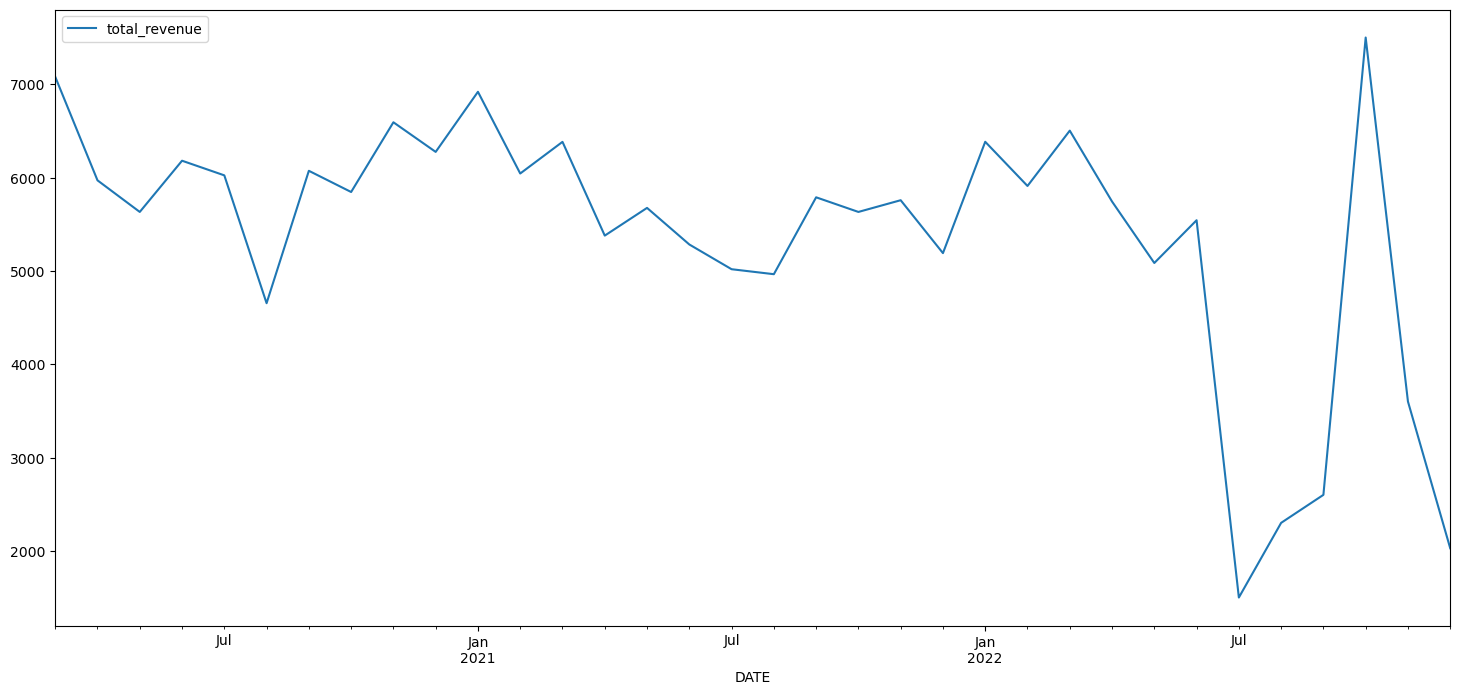

In [32]:
df3 = df2.resample('MS').mean().dropna(inplace=False)
df3.plot()

In [33]:
df2_sample = df2.drop(['NAICS_DESC','anonimized_name'],axis =1)
df2_sample

total_revenue
DATE                     
2020-03-05           1228
2020-03-06           6149
2020-03-09          10106
2020-03-10          10567
2020-03-11           6833
2020-03-12           3878
2020-03-13           5693
2020-03-16           4942
2020-03-17           6106
2020-03-18           4443
2020-03-19           8340
2020-03-20          35570
2020-03-23           4838
2020-03-24           6718
2020-03-25           3492
2020-03-26           3958
2020-03-27           4115
2020-03-30           3582
2020-03-31           3950
2020-04-01           3820
2020-04-02           2953
2020-04-03           7227
2020-04-06           5308
2020-04-07           7876
2020-04-08           6507
2020-04-09           7082
2020-04-10           2864
2020-04-13           3457
2020-04-14           5547
2020-04-15           5160
2020-04-16           4318
2020-04-17           3464
2020-04-20           6831
2020-04-21           5991
2020-04-22           5826
2020-04-23           6380
2020-04-24           9731
2020-04-27           5561
2020-04-28           9101
2020-04-29          10115
2020-04-30           6215
2020-05-01           5931
2020-05-04           5917
2020-05-05           6051
2020-05-06           4897
2020-05-07           4419
2020-05-08           3545
2020-05-11           4656
2020-05-12           7048
2020-05-13           5311
2020-05-14           6746
2020-05-15           4909
2020-05-18           6792
2020-05-19           7337
2020-05-20           4076
2020-05-21           3914
2020-05-22           6338
2020-05-26           7721
2020-05-27           4797
2020-05-28           4712
2020-05-29           7508
2020-06-01           7623
2020-06-02          12229
2020-06-03           5631
2020-06-04           3975
2020-06-05           4440
2020-06-08           6220
2020-06-09          11834
2020-06-10           4985
2020-06-11           5509
2020-06-12           4917
2020-06-15           5559
2020-06-16           6717
2020-06-17           5343
2020-06-18           5095
2020-06-19           5406
2020-06-22           5083
2020-06-23           7119
2020-06-24           6116
2020-06-25           5999
2020-06-26           4999
2020-06-29           5759
2020-06-30           5402
2020-07-01           8179
2020-07-02           5929
2020-07-06           7294
2020-07-07           7237
2020-07-08           9274
2020-07-09           5585
2020-07-10           9506
2020-07-13           4309
2020-07-14           5264
2020-07-15           5195
2020-07-16           4600
2020-07-17           5534
2020-07-20           4416
2020-07-21           5672
2020-07-22           5458
2020-07-23           4122
2020-07-24           6189
2020-07-27           4753
2020-07-28           6931
2020-07-29           6240
2020-07-30           5194
2020-07-31           5630
2020-08-03            552
2020-08-04          10627
2020-08-05           5641
2020-08-06           4345
2020-08-07            752
2020-08-10           1076
2020-08-11            955
2020-08-12           5364
2020-08-13           5404
2020-08-14           5704
2020-08-17           4164
2020-08-18           5477
2020-08-19           4824
2020-08-20           4645
2020-08-21           6271
2020-08-24           6856
2020-08-25           7525
2020-08-26           4183
2020-08-27           5951
2020-08-28           4048
2020-08-31           3358
2020-09-01           7608
2020-09-02           5055
2020-09-03           5748
2020-09-04           4001
2020-09-08           9491
2020-09-09           8420
2020-09-10           4653
2020-09-11           4501
2020-09-14           5771
2020-09-15           6408
2020-09-16           4950
2020-09-17           6019
2020-09-18           4415
2020-09-21           5658
2020-09-22           7359
2020-09-23           5677
2020-09-24           4848
2020-09-25           4648
2020-09-28           7264
2020-09-29           5440
2020-09-30           9579
2020-10-01           7596
2020-10-02           4599
2020-10-05           5789
2020-10-06           6115
2020-10-07           5839
2020-10-

In [34]:
split = '2022-06-30'
revenue_train = df2_sample[:split]
revenue_test = df2_sample[split:]
revenue_test_final = revenue_test.copy()

In [35]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(revenue_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -21.772969
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


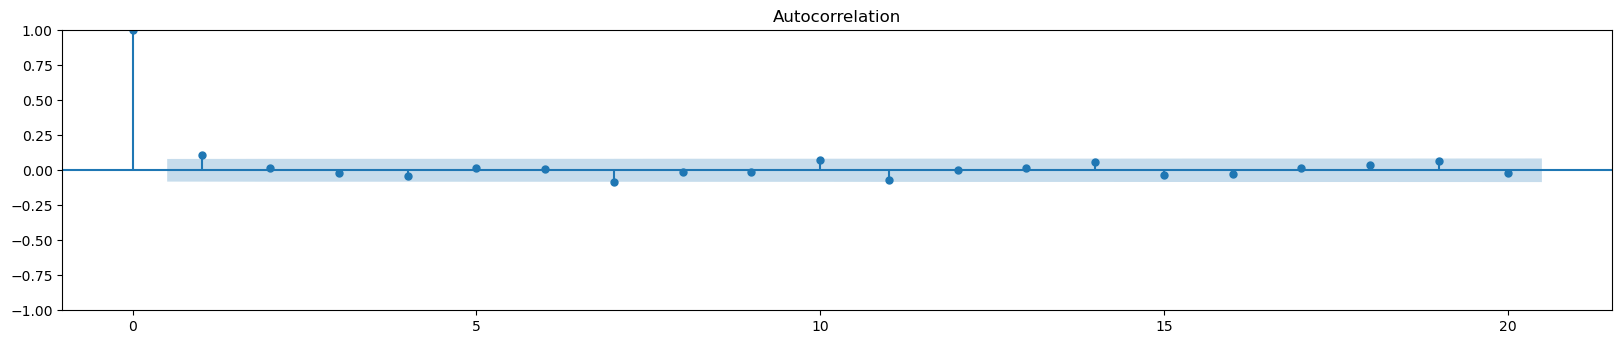

In [36]:
#ACF graph for Stationarity
import statsmodels.api as sm
fig=plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(revenue_train, lags=20, ax=ax1)

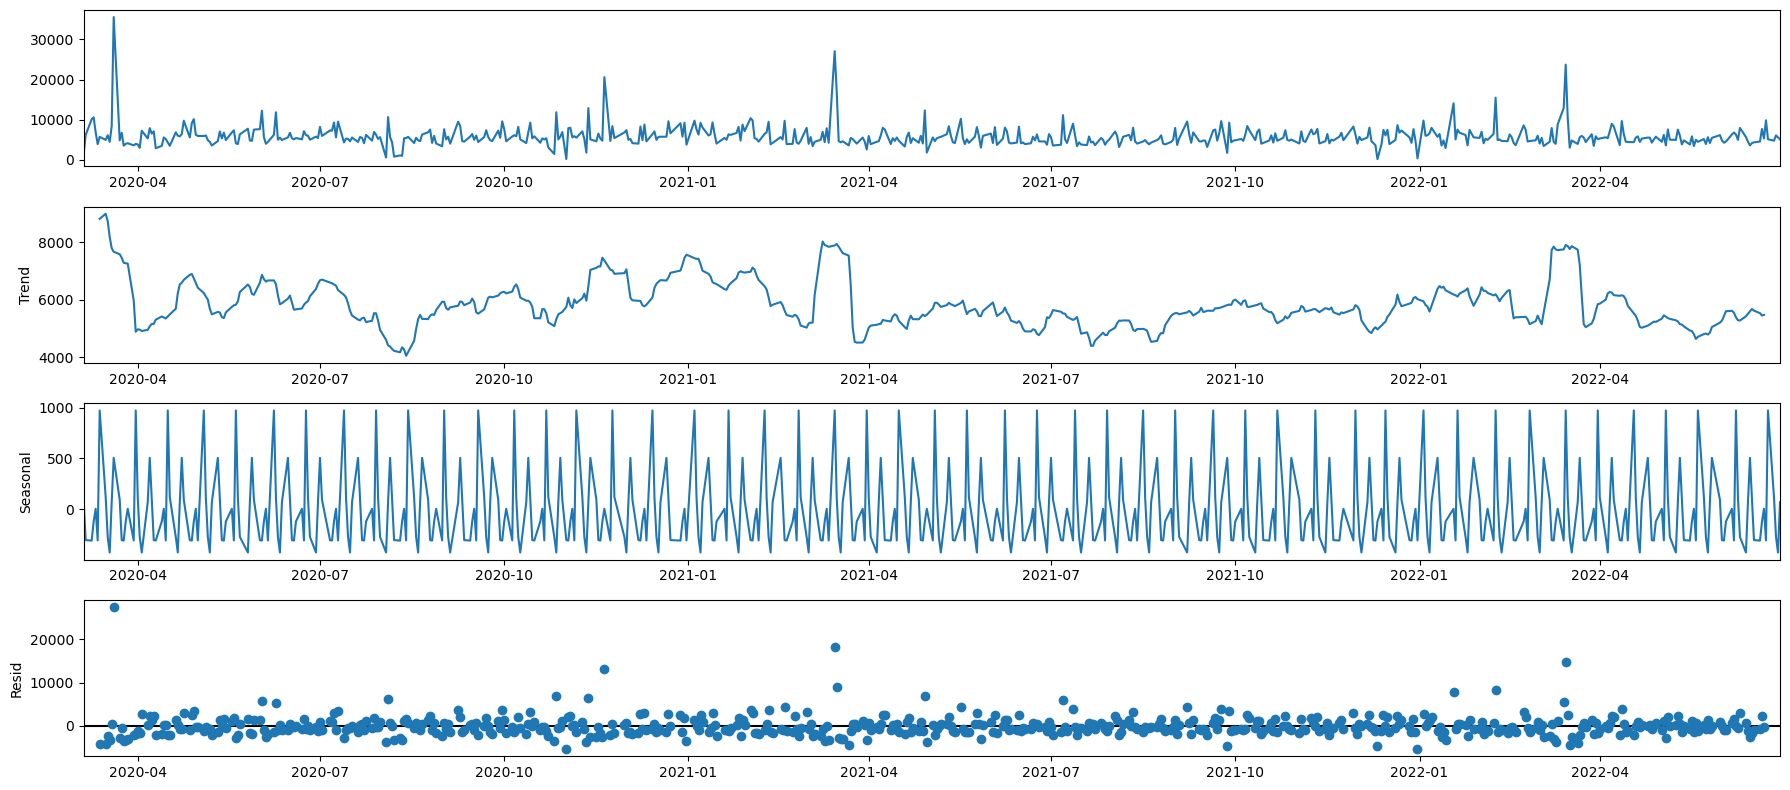

In [37]:
rcParams['figure.figsize'] = (18, 8)
decomposition = sm.tsa.seasonal_decompose(revenue_train, model='additive',period=12)
fig = decomposition.plot()
plt.show()

In [38]:
from pmdarima import auto_arima
stepwise_model = auto_arima(revenue_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

C:\Users\hyeji\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11251.376, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11123.166, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11249.379, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11075.382, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11051.720, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11022.841, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11006.850, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=11004.842, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=11020.820, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Ti

In [39]:
df2_sample_1 = df2_sample.reset_index()
df2_sample_2 = df2_sample_1.set_index('DATE').resample('M').mean()
df2_sample_3 = df2_sample_2.reset_index()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_2780\3478523185.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\hyeji\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


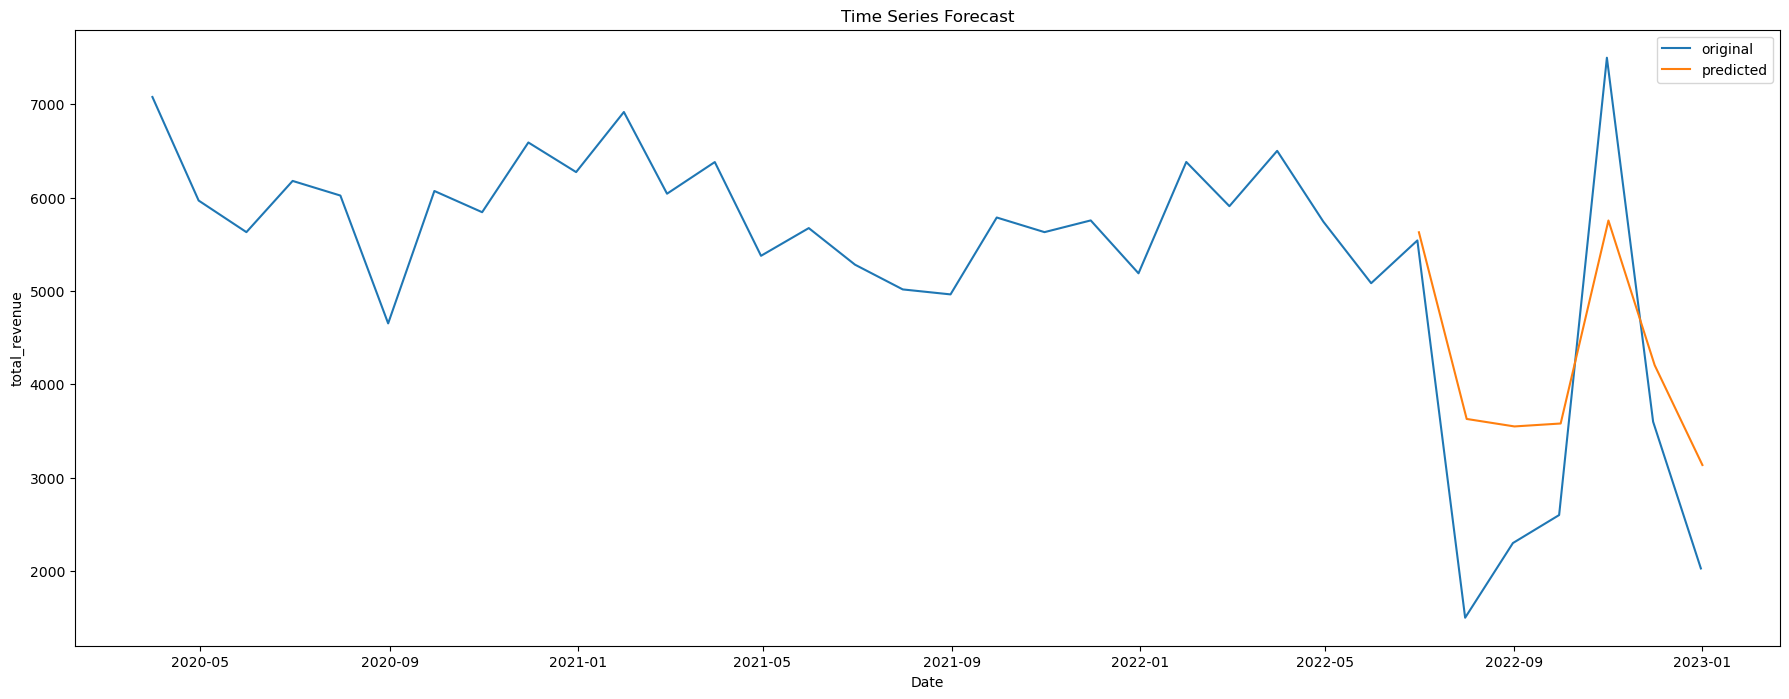

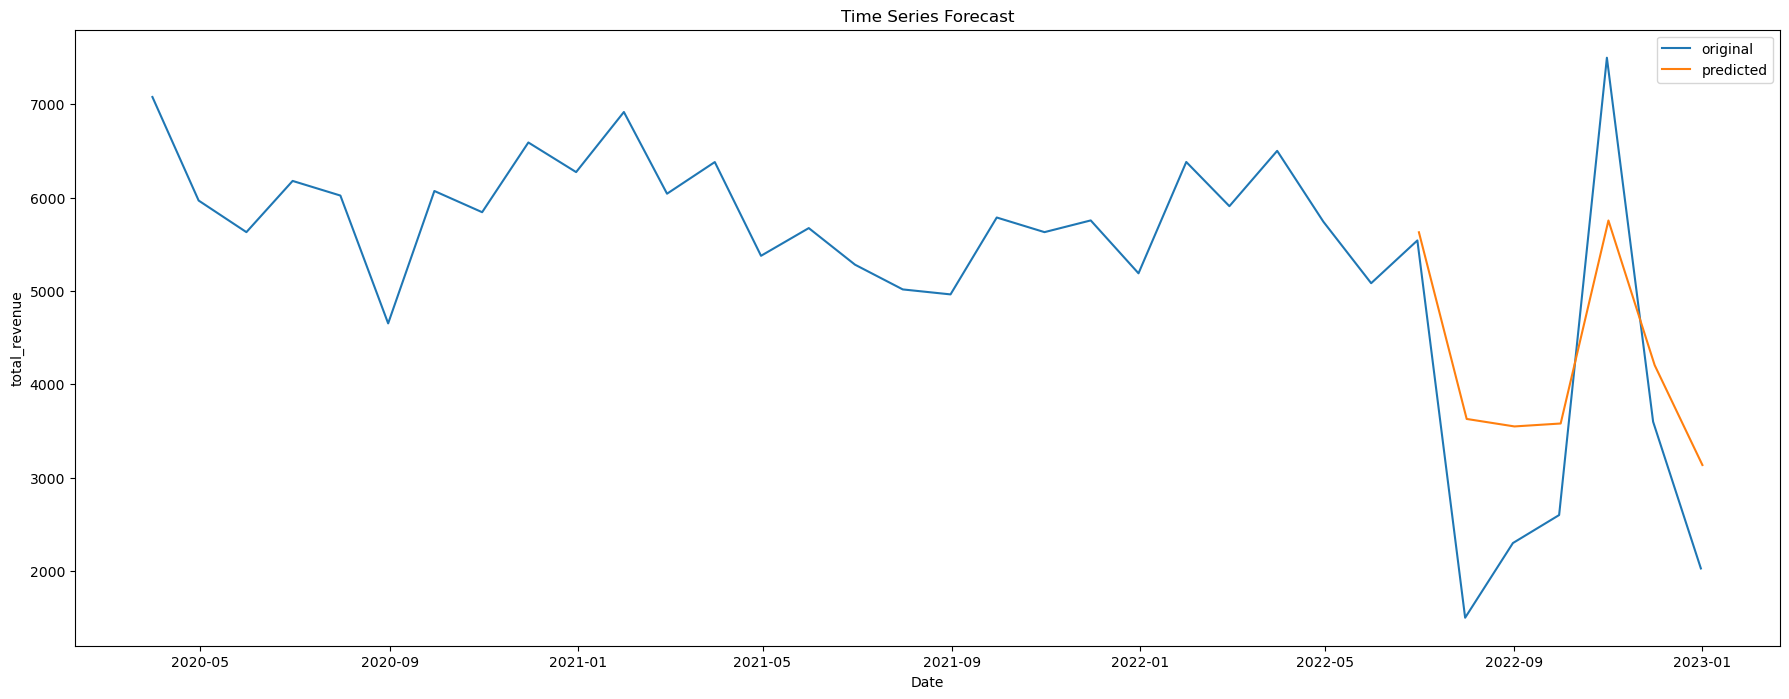

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
import statsmodels.api as smapi

#fit model
#model = smapi.tsa.arima.ARIMA(df2_sample, order=(0,1,1))
#model_fit = model.fit()

model = sm.tsa.arima.ARIMA(df3['total_revenue'], order=(0,1,3))
model=model.fit()
model.summary()

#predict
start_index = datetime(2022, 7, 1)
end_index = datetime(2022, 12, 30)
forecast = model.predict(start=start_index, end=end_index, typ='levels')

plt.figure(figsize=(22,8))
plt.plot(df2_sample_3.DATE,df2_sample_3.total_revenue,label="original")
plt.plot(forecast, label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("total_revenue")
plt.legend()
plt.show(0)

In [41]:
forecast = forecast.resample('MS').mean()
forecast

2022-07-01    5629.806529
2022-08-01    3629.698676
2022-09-01    3549.468259
2022-10-01    3580.915792
2022-11-01    5755.842724
2022-12-01    4206.198831
2023-01-01    3136.001782
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
df3['total_revenue'].mean()

5383.494825196565

In [43]:
forecast.shape

(7,)

In [44]:
df3['total_revenue'].shape

(34,)

In [46]:
#Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast,df4))
print(rmse)

1293.0501624140365
